# Model - Random Forest Regressor

In [ ]:
# import packages 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns

# import packages for ML modelling
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import pickle



## Import data splits - train and test data

In [ ]:
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")

X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")

In [ ]:
y_train.max()

sold_price    6600000
dtype: int64

# Building RFR Model

### Default settings

In [ ]:
default_rfr = RandomForestRegressor()
default_rfr.fit(X_train, y_train)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor()

In [ ]:
# evaluate 

y_true = y_test # real values 
y_pred = default_rfr.predict(X_test) # predicted values 

r2_default = round(metrics.r2_score(y_true, y_pred), 4)
mae_default = round(metrics.mean_absolute_error(y_true, y_pred),2)
mape_default = round(metrics.mean_absolute_percentage_error(y_true, y_pred),4)

eval_dict_default = {'R2': r2_default, 'MAE': mae_default, 'MAPE': mape_default}
eval_df_default = pd.DataFrame.from_dict(eval_dict_default, orient='index').transpose()

eval_df_default

,R2,MAE,MAPE
0,0.8454,376152.14,0.109


## 🛑 stooop - GridSearch 

In [ ]:
"""
n_estimators = [200, 400]
max_features = ['auto', 'sqrt']
max_depth = None, 
min_samples_split = [2, 3]
min_samples_leaf = [1, 2]
bootstrap = [True]

grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rfr_grid = RandomForestRegressor()

rfr_cv = RandomizedSearchCV(
    estimator=rfr_grid,
    param_distributions=grid, 
    cv=3, 
    verbose=1)

"""

"\nn_estimators = [200, 400]\nmax_features = ['auto', 'sqrt']\nmax_depth = None, \nmin_samples_split = [2, 3]\nmin_samples_leaf = [1, 2]\nbootstrap = [True]\n\ngrid = {'n_estimators': n_estimators, 'max_features': max_features,\n               'max_depth': max_depth, 'min_samples_split': min_samples_split,\n               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}\n\nrfr_grid = RandomForestRegressor()\n\nrfr_cv = RandomizedSearchCV(\n    estimator=rfr_grid,\n    param_distributions=grid, \n    cv=3, \n    verbose=1)\n\n"

In [ ]:
"""
# fit it 
rfr_cv.fit(X_train, y_train)

print(rfr_cv.best_score_)
print(rfr_cv.best_params_)

rfr_cv.score(X_test, y_test)
"""

'\n# fit it \nrfr_cv.fit(X_train, y_train)\n\nprint(rfr_cv.best_score_)\nprint(rfr_cv.best_params_)\n\nrfr_cv.score(X_test, y_test)\n'

# 🛑 stooop

### Single parameter setting 

In [ ]:
rfr_model = RandomForestRegressor(
    criterion="mae",
    max_depth=None, 
    min_samples_leaf=1,
    max_features= 'sqrt', 
    min_samples_split=2,
    n_estimators=200,
    bootstrap= True)


rfr_model.fit(X_train, y_train)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mae', max_features='sqrt', n_estimators=200)

### Evaluate

In [ ]:

# evaluate 

y_true = y_test # real values 
y_pred = rfr_model.predict(X_test) # predicted values 

r2 = round(metrics.r2_score(y_true, y_pred), 4)
mae = round(metrics.mean_absolute_error(y_true, y_pred),2)
mape = round(metrics.mean_absolute_percentage_error(y_true, y_pred),4)

eval_dict = {'R2': r2, 'MAE': mae, 'MAPE': mape}
eval_df = pd.DataFrame.from_dict(eval_dict, orient='index').transpose()

eval_df


,R2,MAE,MAPE
0,0.84,386544.1,0.1076


## Graph

178


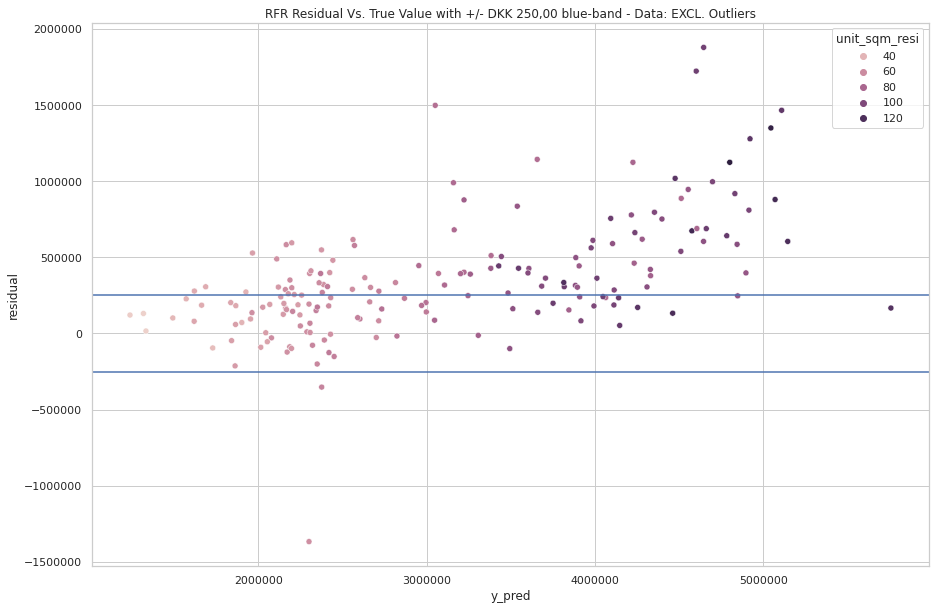

<Figure size 7200x7200 with 0 Axes>

In [ ]:
# make results dataframe
df_results = pd.read_csv("X_test.csv")

df_results['y_true'] = y_true
df_results['y_pred'] = np.round(y_pred)
df_results['residual'] = df_results['y_true'] - df_results['y_pred'] 
df_results['residual_abs'] = abs(df_results['y_true'] - df_results['y_pred'])


# make chart for pred. and residuals 
sns.set(style='whitegrid', rc={"figure.figsize":(15, 10)})
 
sns.scatterplot(x= df_results.y_pred,
                    y=df_results.residual,
                    data=df_results,
                    hue=df_results.unit_sqm_resi,                   
                    )
plt.title('RFR Residual Vs. True Value with +/- DKK 250,00 blue-band - Data: EXCL. Outliers')

# ax lines 
plt.axhline(250000)
plt.axhline(-250000)

plt.ticklabel_format(style='plain')
plt.figure(figsize=(100,100))

print(len(y_pred))

### Feature importance

In [ ]:
# view the feature importance

feature_scores = pd.Series(rfr_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores[0:20]

gov_property_value               0.150933
unit_sqm_resi                    0.148884
gov_sqm                          0.124505
rooms                            0.078823
gov_land_value                   0.074812
longitude                        0.057914
building_year                    0.054277
bfe                              0.053182
latitude                         0.047986
floor                            0.029325
street_number                    0.026285
month                            0.022849
year_2021                        0.018883
year_2019                        0.010751
street_name_IslandsBrygge        0.009137
year_2020                        0.008448
street_name_Strandlodsvej        0.003594
street_name_Weidekampsgade       0.003391
year_2022                        0.002661
street_name_ØrestadsBoulevard    0.002602
dtype: float64

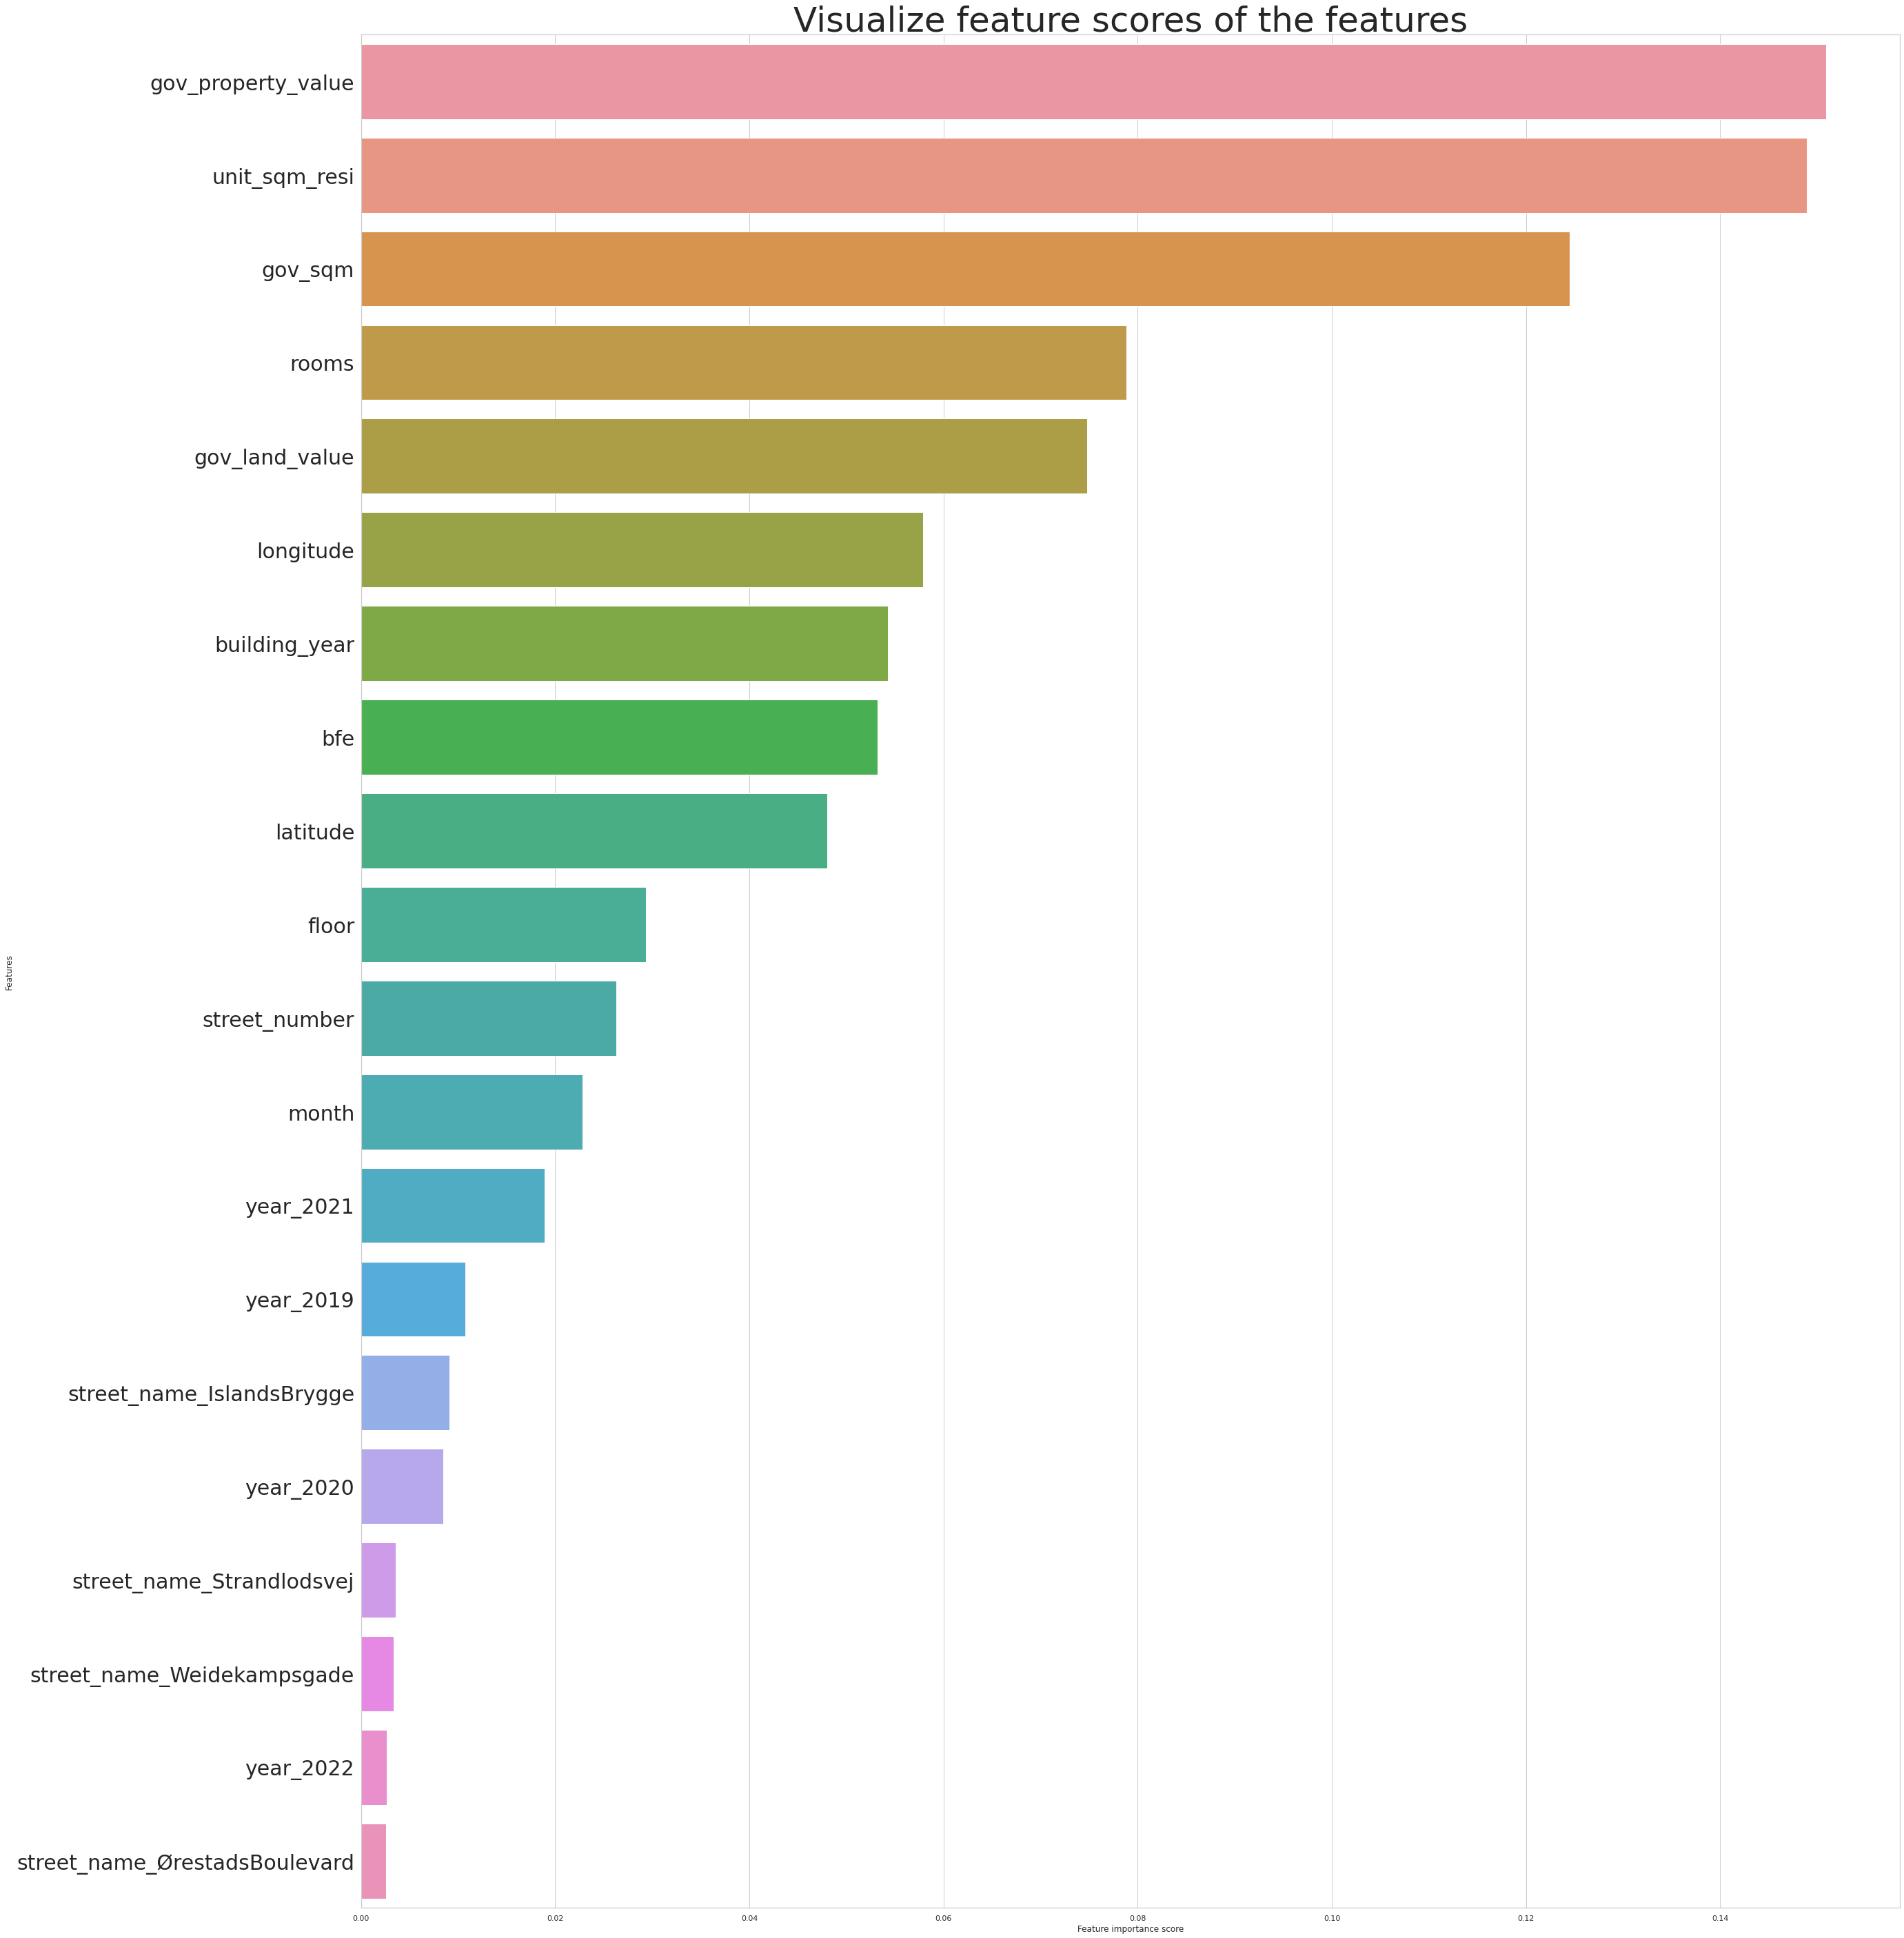

In [ ]:
f, ax = plt.subplots(figsize=(40, 50))
ax = sns.barplot(x=feature_scores[0:20], y=feature_scores[0:20].index)
ax.set_title("Visualize feature scores of the features", fontsize=50)
ax.set_yticklabels(feature_scores[0:20].index, fontsize=30)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

### Visualise one tree 🌳 (not the advantage of RF 😉)

[Text(0.8108403385779358, 0.9868421052631579, 'X[155] <= 0.5\nabsolute_error = 997316.477\nsamples = 2154\nvalue = 2950000.0'),
 Text(0.6235254474243241, 0.9605263157894737, 'X[1] <= 1325000.0\nabsolute_error = 992819.684\nsamples = 2144\nvalue = 2950000.0'),
 Text(0.2744997853207807, 0.9342105263157895, 'X[3] <= 53.5\nabsolute_error = 433726.205\nsamples = 1116\nvalue = 2225000.0'),
 Text(0.14635926225403062, 0.9078947368421053, 'X[28] <= 0.5\nabsolute_error = 312682.828\nsamples = 379\nvalue = 1800000.0'),
 Text(0.12616555462009263, 0.881578947368421, 'X[87] <= 0.5\nabsolute_error = 314247.75\nsamples = 361\nvalue = 1820000.0'),
 Text(0.09638556839581852, 0.8552631578947368, 'X[196] <= 0.5\nabsolute_error = 313320.699\nsamples = 350\nvalue = 1830000.0'),
 Text(0.05046020172370722, 0.8289473684210527, 'X[195] <= 0.5\nabsolute_error = 262648.991\nsamples = 205\nvalue = 1730000.0'),
 Text(0.020153154364995485, 0.8026315789473685, 'X[2] <= 55000.0\nabsolute_error = 275817.889\nsamples = 

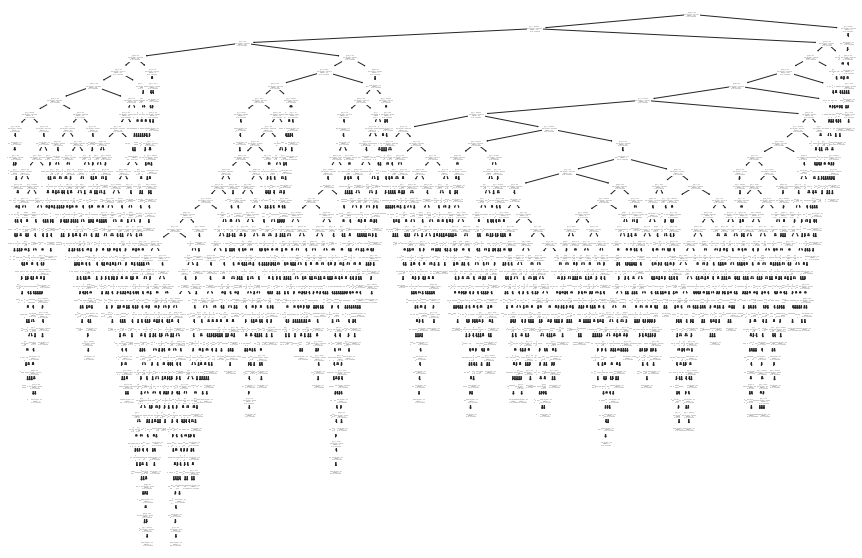

In [ ]:
from sklearn import tree
tree.plot_tree(rfr_model.estimators_[0])

### Save &amp; load model

In [ ]:
#save model to folder
with open('rfr_model_pkl', 'wb') as files:
    pickle.dump(rfr_model, files)

In [ ]:
# load saved model

"""
with open('rfr_model_pkl' , 'rb') as f:
    rfr_model = pickle.load(f)

rfr_model.predict()
"""

"\nwith open('rfr_model_pkl' , 'rb') as f:\n    rfr_model = pickle.load(f)\n\nrfr_model.predict()\n"

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8a2d9d23-5445-401b-81ac-9e4d2df66dba' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>